hbonds analysis basically


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = "hbonds_output.csv"

df = pd.read_csv(file)

print(df)

        Frame  Atom1_ID  Atom1_Type  Atom2_ID  Atom2_Type  Distance  \
0          23        17           2        24           3  1.174396   
1          33         2           4         9           4  1.163213   
2          37        21           2        24           3  0.718911   
3          92        27           4        32           2  1.021617   
4          93        28           3        31           4  0.967324   
...       ...       ...         ...       ...         ...       ...   
211747  50000        20           4        34           3  1.134019   
211748  50000        22           4        32           2  1.046308   
211749  50000        23           4        31           4  1.032194   
211750  50000        24           3        30           2  1.002123   
211751  50000        25           3        29           4  1.045557   

           Angle1     Angle2  
0       83.801730  88.617579  
1       92.168573  86.088812  
2       83.523688  96.696505  
3       95.438378  96.1

In [7]:
# count occurences of (x,y)
# occur/50001 
#should be the percentage of frames (x,y) x and y are bonded
s1 = df["Atom1_ID"]
s2 = df["Atom2_ID"]

DICTIONARY_UNO = dict(s1.value_counts())
DICTIONARY_DUE = dict(s2.value_counts())

DICTIONARIOS_FINALES = {}

for i in DICTIONARY_UNO:
    if i in DICTIONARY_DUE:
        DICTIONARIOS_FINALES[i] = DICTIONARY_UNO[i] + DICTIONARY_DUE[i]
    else:
        DICTIONARIOS_FINALES[i] = DICTIONARY_UNO[i]


for i in DICTIONARY_DUE:
    if i not in DICTIONARIOS_FINALES:
        DICTIONARIOS_FINALES[i] = DICTIONARY_DUE[i]

print(DICTIONARIOS_FINALES)
seira = pd.Series(DICTIONARIOS_FINALES)
seira = seira.sort_index()
print(seira)


{24: 29138, 23: 28306, 19: 27570, 20: 27396, 18: 26965, 22: 26500, 21: 26456, 25: 16277, 10: 1077, 1: 236, 9: 327, 26: 216, 11: 309, 3: 207, 2: 182, 8: 276, 5: 185, 4: 251, 7: 227, 27: 133, 12: 220, 6: 222, 28: 234, 17: 175, 13: 166, 14: 245, 15: 1044, 29: 16212, 16: 267, 30: 29156, 31: 28325, 32: 26572, 33: 26468, 34: 27399, 35: 27546, 36: 27019}
1       236
2       182
3       207
4       251
5       185
6       222
7       227
8       276
9       327
10     1077
11      309
12      220
13      166
14      245
15     1044
16      267
17      175
18    26965
19    27570
20    27396
21    26456
22    26500
23    28306
24    29138
25    16277
26      216
27      133
28      234
29    16212
30    29156
31    28325
32    26572
33    26468
34    27399
35    27546
36    27019
dtype: int64


0
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113


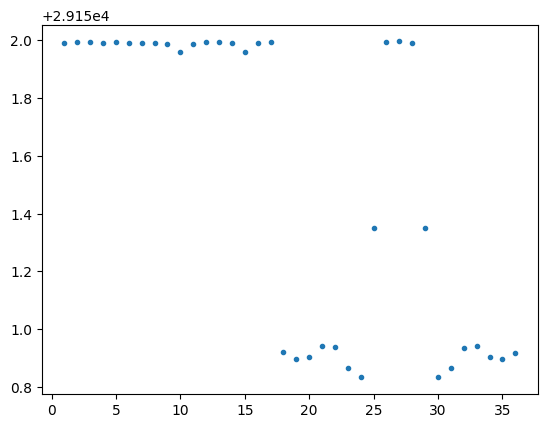

In [8]:
SHAPESeq = seira.max() - (4 + seira/25000)
SHAPESeq.plot(style='.')

for i in range(114):
    if i not in SHAPESeq:
        print(i)

In [9]:
#print(s1,s2)
s_0 = df["Frame"]
s_tmp = pd.merge(s_0, s1, left_index=True, right_index=True)
stot = pd.merge(s_tmp, s2, left_index=True, right_index=True)

print(stot)

        Frame  Atom1_ID  Atom2_ID
0          23        17        24
1          33         2         9
2          37        21        24
3          92        27        32
4          93        28        31
...       ...       ...       ...
211747  50000        20        34
211748  50000        22        32
211749  50000        23        31
211750  50000        24        30
211751  50000        25        29

[211752 rows x 3 columns]


In [10]:
# Write to .dat file
with open('RNA2_HB_PerFrame.dat', 'w') as file:
    # Group the dataframe by each unique frame
    for frame, group in stot.groupby('Frame'):
        # Write the frame header
        file.write(f"{frame} # step {frame}\n")
        
        # Write each pair in that frame
        for _, row in group.iterrows():
            file.write(f"{row['Atom1_ID']} {row['Atom2_ID']}\n")